In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/yulu_rental.csv')

Графік №1
Цей графік показує нам залежність користувачів/вітру.
Робимо висновок, що сильний вітер негативно впливає на аренду ведосипедів.
Спостерігаємо негативну кореляцію.

In [2]:
df.groupby('windspeed')[['registered', 'casual']].sum()

,registered,casual
windspeed,,
0.0000,172391,39135
6.0032,104293,24645
7.0015,146308,29319
8.9981,161716,35007
11.0014,174339,39452
12.9980,171667,39077
15.0013,164283,38328
16.9979,143331,33703
19.0012,117909,29494


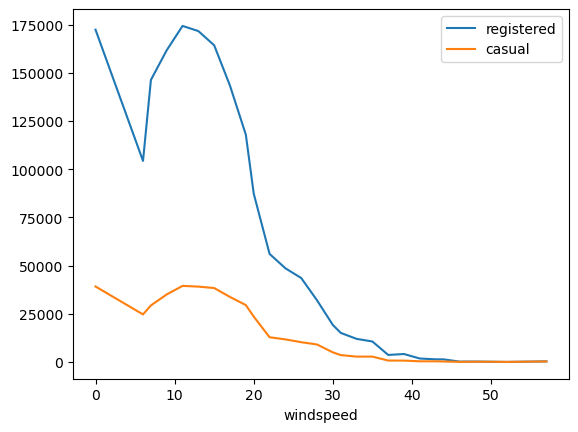

In [3]:
df.groupby('windspeed')[['registered', 'casual']].sum().plot();

Графік №2
Дослідимо кількість неформальних та зареєстрованих користувачів у робочі та вихідні/святкові дні.
Помічаємо, що у робочі дні переважає (більше ніж у два рази) кількість зареєстрованих користувачів.
Споcтерігаємо, що кількість неформальних користувачів розприділяється рівнормірно у робочі та святкові/вихідні дні.
Здається, що існує позитивна кореляція між кількістю зареєстрованих та неформальних користувачів — коли одна категорія користувачів збільшується, збільшується і інша. Проте, кількість зареєстрованих користувачів зазвичай вища ніж кількість неформальних.
Маржинальні гістограми на верхньому та правому краю графіка показують розподіл кількості неформальних та зареєстрованих користувачів відповідно. Ці розподіли підтверджують, що у зареєстрованих користувачів спостерігається вищий рівень користування велопрокатом, особливо у робочі дні.

In [4]:
df.groupby('workingday')[['registered', 'casual']].sum()

,registered,casual
workingday,,
0,448835,206037
1,1244506,186098


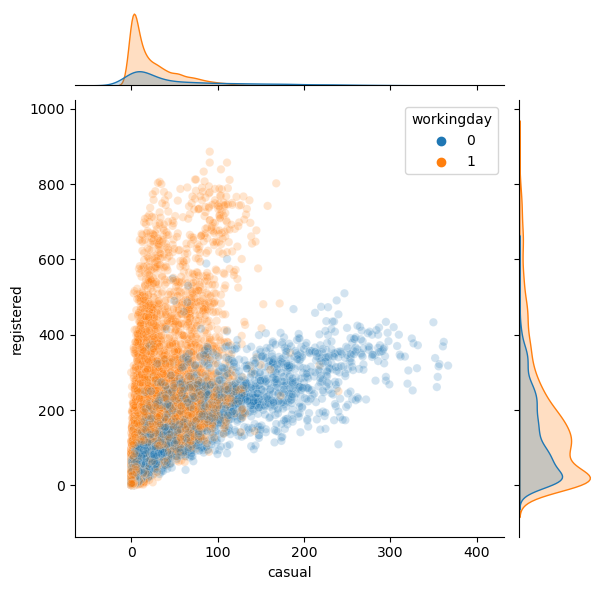

In [5]:
sns.jointplot(data = df, x = "casual", y = "registered", hue = 'workingday', alpha = .2);

Графік №3
Цей графік дасть нам зрозуміти, яка погода сприяє для аренди велосопеда. Також окремо проалізуємо робочі дні та вихідні/святкові дні.
Бачимо, що кількість орендованих велосипедів переважає у робочі дні, скоріше за все люди використовають велосипеди, щоб добиратися на роботу, уникати трафіку.
Аналіз у вихідні дні - є корисним, так як в ці дні можуть бути також туристи і ми можемо дослідити, що впливає на аренду.
У вихідні дні при погоді - 4 зовсім немає оренди.
У будні та вихідні дні переважає погода - 1.
Оренда велосипедів зменшується при погодних умовах 1-4 відповідно.
1. Ясно, Мало хмарно, частково хмарно
2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман

In [6]:
df[['count', 'weather', 'workingday']].groupby(['workingday', 'weather']).sum()

count
workingday weather        
0          1        478473
           2        149377
           3         27022
1          1        997590
           2        357783
           3         75067
           4           164

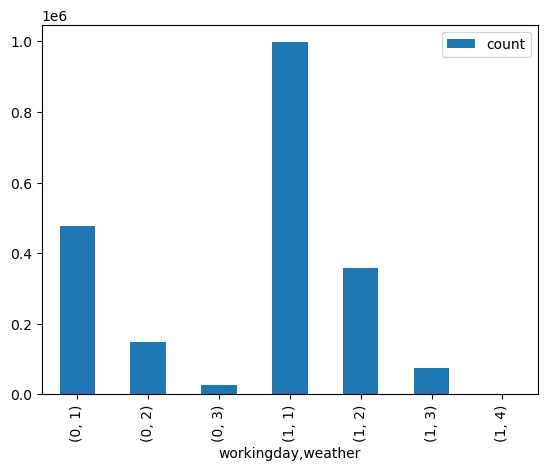

In [7]:
df[['count', 'weather', 'workingday']].groupby(['workingday', 'weather']).sum().plot.bar();